# Zero-shot-prediction

This notebook uses the CLIP model developed by OpenAI.

## Example from https://huggingface.co/openai/clip-vit-large-patch14

In [2]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

/Users/Alexander/opt/anaconda3/envs/tf-metal-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Construction of model. This will take a while.

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

Downloading: 100%|██████████| 4.52k/4.52k [00:00<00:00, 770kB/s]
Downloading: 100%|██████████| 1.71G/1.71G [02:15<00:00, 12.6MB/s]
Downloading: 100%|██████████| 905/905 [00:00<00:00, 326kB/s]
Downloading: 100%|██████████| 961k/961k [00:00<00:00, 1.43MB/s]
Downloading: 100%|██████████| 525k/525k [00:00<00:00, 925kB/s] 
Downloading: 100%|██████████| 2.22M/2.22M [00:00<00:00, 2.46MB/s]
Downloading: 100%|██████████| 389/389 [00:00<00:00, 108kB/s]


In [5]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [7]:
probs # the probabilities make sense

tensor([[9.9925e-01, 7.5487e-04]], grad_fn=<SoftmaxBackward0>)

## Real Case

In [9]:
img = Image.open("dog_ping_pong.jpg")

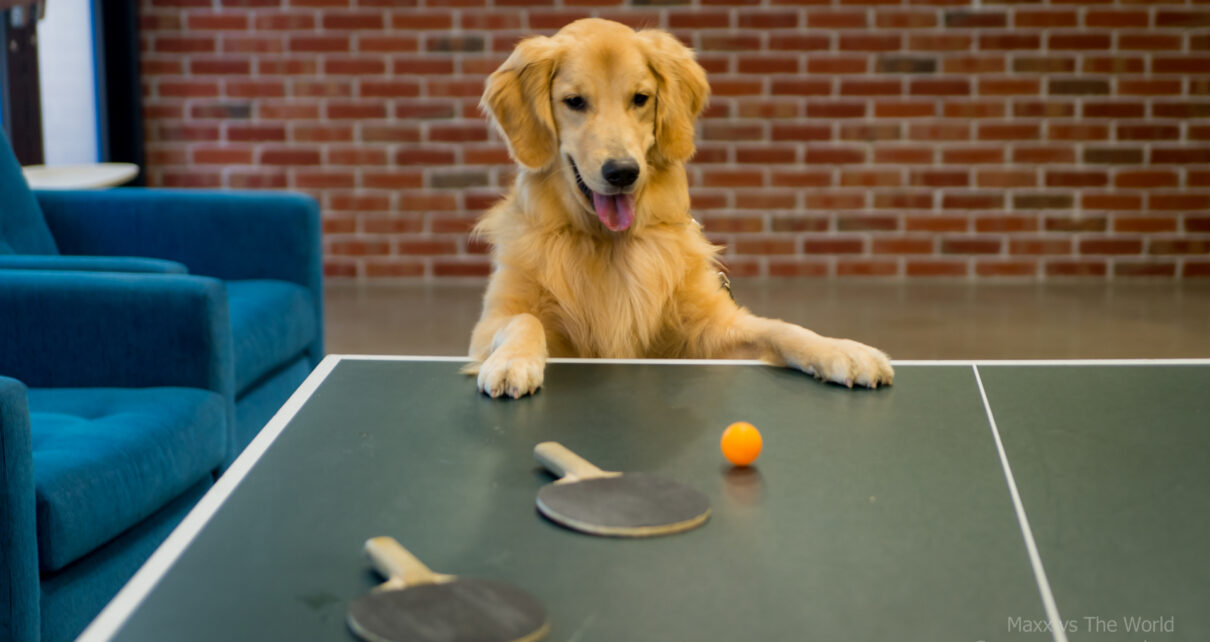

In [13]:
img

In [11]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=img, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [12]:
probs

tensor([[0.0034, 0.9966]], grad_fn=<SoftmaxBackward0>)

In [14]:
inputs = processor(text=["ping pong", "football", "baseball"], images=img, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [15]:
probs

tensor([[9.9983e-01, 4.4937e-05, 1.2819e-04]], grad_fn=<SoftmaxBackward0>)

In [16]:
inputs = processor(text=["brick wall", "window", "door"], images=img, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [17]:
probs

tensor([[0.8546, 0.0460, 0.0994]], grad_fn=<SoftmaxBackward0>)